In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
directory = os.fsencode("data")

In [26]:
if directory:

    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        df = pd.read_csv("data/" + filename, header=2)

In [28]:
pedesTimes = []
carsTimes = []
for agent in range(len(df["agent_type"])):
    if df["agent_type"][agent] == 'Pedestrian':
        pedesTimes.append(df['time_spent'][agent])
    else:
        carsTimes.append(df['time_spent'][agent])

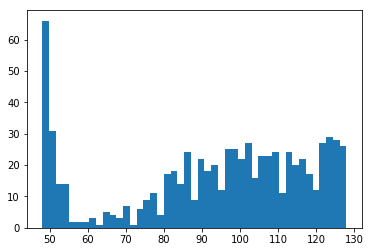

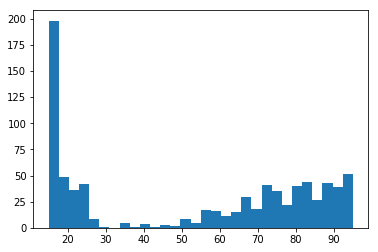

In [37]:
plt.hist(pedesTimes, bins = 45)
plt.show()
plt.hist(carsTimes, bins = 30)
plt.show()

In [38]:
# ratio of unobserved data/total data
def createBatchData(ratio, amount, data):
    period = int(len(data) / amount)
#     print(period)
    intervalSize = int((ratio) * period)
#     print(period, intervalSize)
    dataBatchArray = []
    currentIndex = 0
    
    # Benedict, is that you?
    currentBatch = []

    for sample in data:

        if currentIndex >= intervalSize and currentIndex < period:
#             print(sample)
            currentBatch.append(sample)
            currentIndex = currentIndex + 1
            
            if currentIndex >= period:
                dataBatchArray.append((np.mean(currentBatch), np.std(currentBatch)))
                currentBatch = []
                currentIndex = 0
        else:
            currentIndex = currentIndex + 1
            

    return dataBatchArray

def accCheck(data, sample_size):
    
    means = []
    # calculate means for each batch -> then for each simulation
    for i in data:
        tempMeans = []
        for j in i:
            tempMeans.append(j[0])
        means.append(tempMeans)

    # total mean
    stds = np.std(means)
    means = np.mean(means)

    Za = 1.96
    # Get confidence bounds (mean +- z*S/sqrt(n))
    confidence = [means-Za*(stds/sample_size**.5), means+Za*(stds/sample_size**.5)]

    # Get accuracy (Z*sqrt(mean(1-mean)))/sqrt(n)
    accuracy = (Za*stds) / (sample_size **.5 * means)
    return accuracy, confidence 

In [44]:
batchMeans = createBatchData(0.3, 30, carsTimes)

# we need to do more than 1 simulation right?
accCheck(batchMeans, 750)

IndexError: invalid index to scalar variable.